In [ ]:
import torch
import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose
from torchvision.datasets import MNIST

mnist = MNIST(root='data',
              train=True,
              download=True,
              transform=Compose([ToTensor(), Normalize(mean=(0.5,), std=(0.5,))]))


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
img, label = mnist[0]
print('Label: ', label)
print(img[:,5:15,10:15])
torch.min(img), torch.max(img)

Label:  5
tensor([[[-1.0000, -1.0000, -0.9765, -0.8588, -0.8588],
         [-0.2627,  0.2078,  0.3333,  0.9843,  0.9843],
         [ 0.9843,  0.9843,  0.9843,  0.9843,  0.9843],
         [ 0.9843,  0.9843,  0.9843,  0.9843,  0.5529],
         [-0.1608,  0.9843,  0.9843,  0.6078, -0.9137],
         [-0.9922,  0.2078,  0.9843, -0.2941, -1.0000],
         [-1.0000,  0.0902,  0.9843,  0.4902, -0.9843],
         [-1.0000, -0.9137,  0.4902,  0.9843, -0.4510],
         [-1.0000, -1.0000, -0.7255,  0.8902,  0.7647],
         [-1.0000, -1.0000, -1.0000, -0.3647,  0.8824]]])


(tensor(-1.), tensor(1.))

In [ ]:
def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)

Label: 5


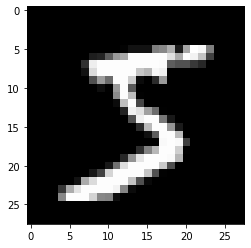

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

img_norm = denorm(img)
plt.imshow(img_norm[0], cmap='gray')
print('Label:', label)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 200
data_loader = DataLoader(mnist, batch_size, shuffle=True)

first batch
torch.Size([200, 1, 28, 28])
tensor([9, 1, 3, 7, 7, 3, 8, 3, 9, 9, 2, 6, 8, 1, 3, 5, 1, 8, 9, 6, 8, 4, 9, 7,
        5, 0, 9, 4, 5, 1, 6, 4, 9, 8, 8, 4, 2, 6, 8, 0, 6, 0, 2, 2, 8, 2, 2, 6,
        9, 0, 9, 6, 4, 8, 6, 9, 3, 5, 6, 1, 9, 0, 4, 5, 4, 8, 9, 0, 8, 8, 5, 1,
        2, 7, 8, 8, 6, 8, 6, 1, 7, 6, 1, 7, 8, 3, 6, 3, 7, 7, 1, 3, 5, 2, 9, 5,
        5, 4, 0, 1, 7, 4, 7, 0, 3, 7, 2, 7, 6, 2, 0, 3, 8, 1, 3, 3, 1, 9, 1, 5,
        0, 4, 8, 6, 1, 0, 4, 2, 0, 5, 4, 5, 7, 5, 0, 0, 3, 8, 2, 8, 1, 0, 3, 1,
        7, 1, 6, 0, 4, 6, 7, 4, 7, 4, 8, 1, 0, 6, 8, 7, 7, 3, 7, 5, 9, 4, 1, 6,
        4, 6, 6, 0, 3, 0, 2, 1, 6, 0, 7, 5, 6, 3, 3, 8, 9, 4, 3, 8, 1, 6, 9, 3,
        3, 2, 2, 9, 0, 1, 7, 2])


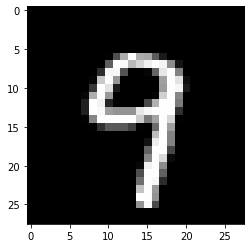

In [ ]:
for img_batch, label_batch in data_loader:
    print('first batch')
    print(img_batch.shape)
    plt.imshow(img_batch[0][0], cmap='gray')
    print(label_batch)
    break

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import SubsetRandomSampler, DataLoader
from torchvision import datasets, transforms

In [ ]:
transform=transforms.ToTensor()

In [ ]:
train_data=datasets.MNIST('data',train=True,download=True,transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
batch_size=20
num_workers=0
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,num_workers=num_workers)

first batch
torch.Size([20, 1, 28, 28])
tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9])


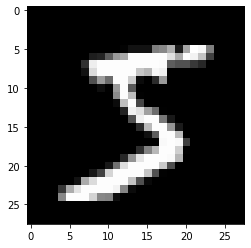

In [ ]:
for img_batch, label_batch in train_loader:
    print('first batch')
    print(img_batch.shape)
    plt.imshow(img_batch[0][0], cmap='gray')
    print(label_batch)
    break

In [ ]:
iterator=iter(train_loader)
images,labels = next(iter(iterator))
print(images, images.shape, len(images), images[0].shape)
print()
print(labels,labels.shape,len(labels))


tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

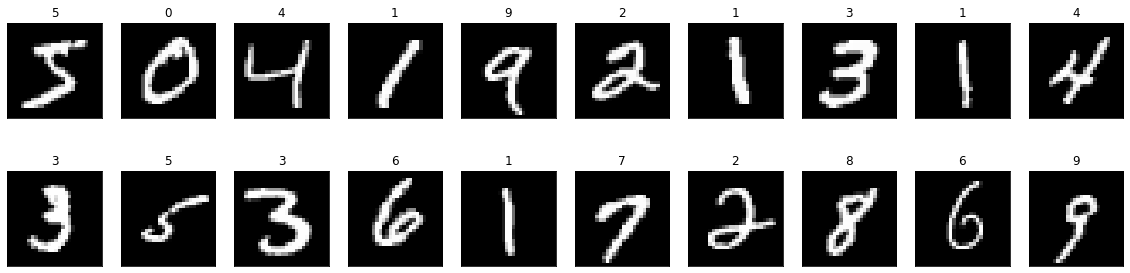

In [ ]:
fig=plt.figure(figsize=(20,5))
for i in range(len(labels)):
    axis=fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
    plt.imshow(np.squeeze(images[i]),cmap='gray')
    axis.set_title(labels[i].item(),color='black')

In [ ]:
class Generator(nn.Module):

    def __init__(self, input_size, hidden_dim, output_size):
        super(Generator, self).__init__()

        self.layer1 = nn.Linear(input_size, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim*2)
        self.layer3 = nn.Linear(hidden_dim*2, hidden_dim*4)

        self.layer4 = nn.Linear(hidden_dim*4, output_size)

        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = F.leaky_relu(self.layer1(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.layer2(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.layer3(x), 0.2)
        x = self.dropout(x)
        output = F.tanh(self.layer4(x))

        return output

In [ ]:
class Discriminator(nn.Module):

    def __init__(self, input_size, hidden_dim, output_size):
        super(Discriminator, self).__init__()

        self.layer1 = nn.Linear(input_size, hidden_dim*4)
        self.layer2 = nn.Linear(hidden_dim*4, hidden_dim*2)
        self.layer3 = nn.Linear(hidden_dim*2, hidden_dim)

        self.layer4 = nn.Linear(hidden_dim, output_size)

        self.dropout = nn.Dropout(0.3)


    def forward(self, x):

        x = x.view(-1, 28*28)
        x = F.leaky_relu(self.layer1(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.layer2(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.layer3(x), 0.2)
        x = self.dropout(x)
        # final layer
        output = self.layer4(x)

        return output

In [ ]:
# Discrimator hyperparameters
input_size = 784
d_output_size = 1
d_hidden_size = 32

# Generator hyperparameters
latent_size = 50
g_output_size = 784
g_hidden_size = 32

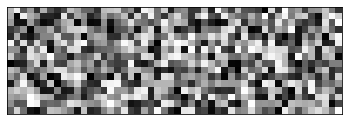

In [ ]:
#Sample generation of latent vector
z = np.random.uniform(-1, 1, size=(16, latent_size))
plt.imshow(z, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:

# instantiate discriminator and generator
D = Discriminator(input_size, d_hidden_size, d_output_size)
G = Generator(latent_size, g_hidden_size, g_output_size)

# check that they are as you expect
print(D)
print()
print(G)

Discriminator(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=32, bias=True)
  (layer4): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

Generator(
  (layer1): Linear(in_features=50, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=128, bias=True)
  (layer4): Linear(in_features=128, out_features=784, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)


In [ ]:
# Calculate losses
def real_loss(D_out, smooth=False):
    batch_size = D_out.size(0)
    # label smoothing
    if smooth:
        # smooth, real labels = 0.9
        labels = torch.ones(batch_size)*0.9
    else:
        labels = torch.ones(batch_size) # real labels = 1

    # numerically stable loss
    criterion = nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

def fake_loss(D_out):
    batch_size = D_out.size(0)
    labels = torch.zeros(batch_size) # fake labels = 0
    criterion = nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

In [ ]:
import torch.optim as optim

# Optimizers
lr = 0.002

# Create optimizers for the discriminator and generator
d_optimizer = optim.Adam(D.parameters(), lr)
g_optimizer = optim.Adam(G.parameters(), lr)

In [ ]:
import pickle as pkl

# training hyperparams
num_epochs = 175

# keep track of loss and generated, "fake" samples
samples = []
losses = []

print_every = 400

# Get some fixed data for sampling. These are images that are held
# constant throughout training, and allow us to inspect the model's performance
sample_size=16
fixed_z = np.random.uniform(-1, 1, size=(sample_size, latent_size))
fixed_z = torch.from_numpy(fixed_z).float()

# train the network
D.train()
G.train()
for epoch in range(num_epochs):

    for batch_i, (real_images, _) in enumerate(train_loader):

        batch_size = real_images.size(0)

        ## Important rescaling step ##
        real_images = real_images*2 - 1  # rescale input images from [0,1) to [-1, 1)

        # ============================================
        #            TRAIN THE DISCRIMINATOR
        # ============================================

        d_optimizer.zero_grad()

        # 1. Train with real images

        # Compute the discriminator losses on real images
        # smooth the real labels
        D_real = D(real_images)
        d_real_loss = real_loss(D_real, smooth=True)

        # 2. Train with fake images

        # Generate fake images
        z = np.random.uniform(-1, 1, size=(batch_size, latent_size))
        z = torch.from_numpy(z).float()
        fake_images = G(z)

        # Compute the discriminator losses on fake images
        D_fake = D(fake_images)
        d_fake_loss = fake_loss(D_fake)

        # add up loss and perform backprop
        d_loss = d_real_loss + d_fake_loss
        d_loss.backward()
        d_optimizer.step()


        # =========================================
        #            TRAIN THE GENERATOR
        # =========================================
        g_optimizer.zero_grad()

        # 1. Train with fake images and flipped labels

        # Generate fake images
        z = np.random.uniform(-1, 1, size=(batch_size, latent_size))
        z = torch.from_numpy(z).float()
        fake_images = G(z)

        # Compute the discriminator losses on fake images
        # using flipped labels!
        D_fake = D(fake_images)
        g_loss = real_loss(D_fake) # use real loss to flip labels

        # perform backprop
        g_loss.backward()
        g_optimizer.step()

        # Print some loss stats
        if batch_i % print_every == 0:
            # print discriminator and generator loss
            print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                    epoch+1, num_epochs, d_loss.item(), g_loss.item()))


    ## AFTER EACH EPOCH##
    # append discriminator loss and generator loss
    losses.append((d_loss.item(), g_loss.item()))

    # generate and save sample, fake images
    G.eval() # eval mode for generating samples
    samples_z = G(fixed_z)
    samples.append(samples_z)
    G.train() # back to train mode


# Save training generator samples
with open('train_samples.pkl', 'wb') as f:
    pkl.dump(samples, f)

Epoch [    1/  175] | d_loss: 0.9679 | g_loss: 1.3690
Epoch [    1/  175] | d_loss: 0.9422 | g_loss: 1.6222
Epoch [    1/  175] | d_loss: 1.2347 | g_loss: 2.8585
Epoch [    1/  175] | d_loss: 1.4984 | g_loss: 1.5355
Epoch [    1/  175] | d_loss: 1.1170 | g_loss: 1.8238
Epoch [    1/  175] | d_loss: 0.9613 | g_loss: 1.9763
Epoch [    1/  175] | d_loss: 1.0285 | g_loss: 1.3761
Epoch [    1/  175] | d_loss: 1.2854 | g_loss: 1.3158
Epoch [    2/  175] | d_loss: 1.0288 | g_loss: 1.6740
Epoch [    2/  175] | d_loss: 1.2889 | g_loss: 1.7711
Epoch [    2/  175] | d_loss: 1.0649 | g_loss: 1.5197
Epoch [    2/  175] | d_loss: 1.0331 | g_loss: 1.6575
Epoch [    2/  175] | d_loss: 1.1408 | g_loss: 1.5031
Epoch [    2/  175] | d_loss: 1.1073 | g_loss: 1.2777
Epoch [    2/  175] | d_loss: 0.8475 | g_loss: 1.4687
Epoch [    2/  175] | d_loss: 1.1814 | g_loss: 2.3002
Epoch [    3/  175] | d_loss: 0.9836 | g_loss: 2.0251
Epoch [    3/  175] | d_loss: 0.7577 | g_loss: 1.5310
Epoch [    3/  175] | d_loss

KeyboardInterrupt: ignored

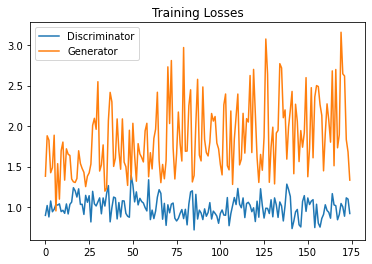

In [ ]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator')
plt.plot(losses.T[1], label='Generator')
plt.title("Training Losses")
plt.legend()
plt.show()

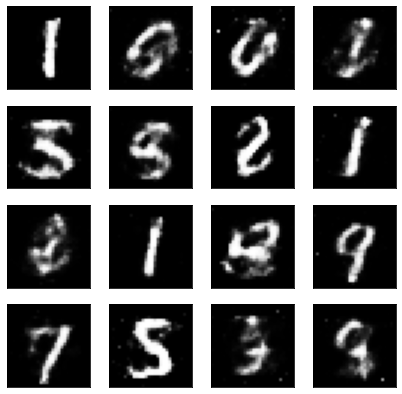

In [ ]:
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(7,7), nrows=4, ncols=4, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        img = img.detach()
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((28,28)), cmap='Greys_r')

# Load samples from generator, taken while training
with open('train_samples.pkl', 'rb') as f:
    samples = pkl.load(f)
view_samples(-1, samples)